# Case Study

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#From-list-to-dictionary-to-pd.DataFrame" data-toc-modified-id="From-list-to-dictionary-to-pd.DataFrame-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>From list to dictionary to pd.DataFrame</a></span><ul class="toc-item"><li><span><a href="#預設list-&amp;-檔案位置" data-toc-modified-id="預設list-&amp;-檔案位置-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>預設list &amp; 檔案位置</a></span></li><li><span><a href="#Dictionaries-for-data-science" data-toc-modified-id="Dictionaries-for-data-science-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dictionaries for data science</a></span></li><li><span><a href="#Writing-a-function-to-help-you" data-toc-modified-id="Writing-a-function-to-help-you-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Writing a function to help you</a></span></li><li><span><a href="#Using-a-list-comprehension" data-toc-modified-id="Using-a-list-comprehension-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Using a list comprehension</a></span></li><li><span><a href="#Turning-this-all-into-a-DataFrame" data-toc-modified-id="Turning-this-all-into-a-DataFrame-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Turning this all into a DataFrame</a></span></li></ul></li><li><span><a href="#Using-Python-generators-for-streaming-data" data-toc-modified-id="Using-Python-generators-for-streaming-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using Python generators for streaming data</a></span><ul class="toc-item"><li><span><a href="#Using-Python-generators-for-streaming-data-(1)" data-toc-modified-id="Using-Python-generators-for-streaming-data-(1)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using Python generators for streaming data (1)</a></span><ul class="toc-item"><li><span><a href="#file.readline()性質探討" data-toc-modified-id="file.readline()性質探討-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>file.readline()性質探討</a></span></li></ul></li><li><span><a href="#Using-Python-generators-for-streaming-data-(2)" data-toc-modified-id="Using-Python-generators-for-streaming-data-(2)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using Python generators for streaming data (2)</a></span></li><li><span><a href="#Using-Python-generators-for-streaming-data-(3)" data-toc-modified-id="Using-Python-generators-for-streaming-data-(3)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Using Python generators for streaming data (3)</a></span><ul class="toc-item"><li><span><a href="#既然file-object-已經是-generator，那不用generator-function寫寫看" data-toc-modified-id="既然file-object-已經是-generator，那不用generator-function寫寫看-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>既然file object 已經是 generator，那不用generator function寫寫看</a></span></li></ul></li></ul></li><li><span><a href="#Using-pd.read_csv-iterator-for-streaming-data" data-toc-modified-id="Using-pd.read_csv-iterator-for-streaming-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using pd.read_csv iterator for streaming data</a></span><ul class="toc-item"><li><span><a href="#Writing-an-iterator-to-load-data-in-chunks-(1)" data-toc-modified-id="Writing-an-iterator-to-load-data-in-chunks-(1)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Writing an iterator to load data in chunks (1)</a></span></li><li><span><a href="#Writing-an-iterator-to-load-data-in-chunks-(2)" data-toc-modified-id="Writing-an-iterator-to-load-data-in-chunks-(2)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Writing an iterator to load data in chunks (2)</a></span><ul class="toc-item"><li><span><a href="#探討為何-df_pop-要用兩層？" data-toc-modified-id="探討為何-df_pop-要用兩層？-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>探討為何 df_pop 要用兩層？</a></span></li></ul></li><li><span><a href="#Writing-an-iterator-to-load-data-in-chunks-(3)" data-toc-modified-id="Writing-an-iterator-to-load-data-in-chunks-(3)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Writing an iterator to load data in chunks (3)</a></span></li><li><span><a href="#Writing-an-iterator-to-load-data-in-chunks-(4)" data-toc-modified-id="Writing-an-iterator-to-load-data-in-chunks-(4)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Writing an iterator to load data in chunks (4)</a></span></li><li><span><a href="#Writing-an-iterator-to-load-data-in-chunks-(5)" data-toc-modified-id="Writing-an-iterator-to-load-data-in-chunks-(5)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Writing an iterator to load data in chunks (5)</a></span></li></ul></li><li><span><a href="#Summary-from-CH3-to-CH6" data-toc-modified-id="Summary-from-CH3-to-CH6-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary from CH3 to CH6</a></span></li></ul></div>

## From list to dictionary to pd.DataFrame

- Using zip()
- Defining a function
- list comprehensions

### 預設list & 檔案位置

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

feature_names = [
    'CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
    'Value'
]
row_vals = [
    'Arab World', 'ARB',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'SP.ADO.TFRT', '1960', '133.56090740552298'
]
# 1
row_lists = [
            [
    'Arab World', 'ARB',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'SP.ADO.TFRT', '1960', '133.56090740552298'
            ],
             [
                 'Arab World', 'ARB',
                 'Age dependency ratio (% of working-age population)',
                 'SP.POP.DPND', '1960', '87.7976011532547'
             ],
             [
                 'Arab World', 'ARB',
                 'Age dependency ratio, old (% of working-age population)',
                 'SP.POP.DPND.OL', '1960', '6.634579191565161'
             ],
             [
                 'Arab World', 'ARB',
                 'Age dependency ratio, young (% of working-age population)',
                 'SP.POP.DPND.YG', '1960', '81.02332950839141'
             ],
             [
                 'Arab World', 'ARB',
                 'Arms exports (SIPRI trend indicator values)',
                 'MS.MIL.XPRT.KD', '1960', '3000000.0'
             ],
             [
                 'Arab World', 'ARB',
                 'Arms imports (SIPRI trend indicator values)',
                 'MS.MIL.MPRT.KD', '1960', '538000000.0'
             ],
             [
                 'Arab World', 'ARB', 'Birth rate, crude (per 1,000 people)',
                 'SP.DYN.CBRT.IN', '1960', '47.697888095096395'
             ],
             [
                 'Arab World', 'ARB', 'CO2 emissions (kt)', 'EN.ATM.CO2E.KT',
                 '1960', '59563.9892169935'
             ],
             [
                 'Arab World', 'ARB', 'CO2 emissions (metric tons per capita)',
                 'EN.ATM.CO2E.PC', '1960', '0.6439635478877049'
             ],
             [
                 'Arab World', 'ARB',
                 'CO2 emissions from gaseous fuel consumption (% of total)',
                 'EN.ATM.CO2E.GF.ZS', '1960', '5.041291753975099'
             ],
             [
                 'Arab World', 'ARB',
                 'CO2 emissions from liquid fuel consumption (% of total)',
                 'EN.ATM.CO2E.LF.ZS', '1960', '84.8514729446567'
             ],
             [
                 'Arab World', 'ARB',
                 'CO2 emissions from liquid fuel consumption (kt)',
                 'EN.ATM.CO2E.LF.KT', '1960', '49541.707291032304'
             ],
             [
                 'Arab World', 'ARB',
                 'CO2 emissions from solid fuel consumption (% of total)',
                 'EN.ATM.CO2E.SF.ZS', '1960', '4.72698138789597'
             ],
             [
                 'Arab World', 'ARB', 'Death rate, crude (per 1,000 people)',
                 'SP.DYN.CDRT.IN', '1960', '19.7544519237187'
             ],
             [
                 'Arab World', 'ARB',
                 'Fertility rate, total (births per woman)', 'SP.DYN.TFRT.IN',
                 '1960', '6.92402738655897'
             ],
             [
                 'Arab World', 'ARB', 'Fixed telephone subscriptions',
                 'IT.MLT.MAIN', '1960', '406833.0'
             ],
             [
                 'Arab World', 'ARB',
                 'Fixed telephone subscriptions (per 100 people)',
                 'IT.MLT.MAIN.P2', '1960', '0.6167005703199'
             ],
             [
                 'Arab World', 'ARB', 'Hospital beds (per 1,000 people)',
                 'SH.MED.BEDS.ZS', '1960', '1.9296220724398703'
             ],
             [
                 'Arab World', 'ARB',
                 'International migrant stock (% of population)',
                 'SM.POP.TOTL.ZS', '1960', '2.9906371279862403'
             ],
             [
                 'Arab World', 'ARB', 'International migrant stock, total',
                 'SM.POP.TOTL', '1960', '3324685.0'
             ]]

with open('exercise/world_dev_ind.csv') as file:
    feature_names2 = file.readline().split(',')
    row_lists2 = file.readline().split(',')
print(feature_names2)
print(row_lists2)

['CountryName', 'CountryCode', 'Year', 'Total Population', 'Urban population (% of total)\n']
['Burundi', 'BDI', '1960', '2786740.0', '2.077\n']


### Dictionaries for data science

In [2]:
# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


### Writing a function to help you

In [3]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""
    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)
    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)
    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)
# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


### Using a list comprehension

In [4]:
# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])
# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]
# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}


### Turning this all into a DataFrame

In [5]:
# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]
# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)
# Print the head of the DataFrame
print(df.head(2))

  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   

  IndicatorCode  Year               Value  
0   SP.ADO.TFRT  1960  133.56090740552298  
1   SP.POP.DPND  1960    87.7976011532547  


## Using Python generators for streaming data

- Generators for the large data limit
    - Use a generator to load a file line by line
    - Works on streaming data!
    - Read and process the file until all lines are exhausted


### Using Python generators for streaming data (1)
- 先讀個100行
- ***Note*** 
    - file 並沒有整個被存起來
    - 在 for loop 中，file 的每一行經由 file.readline().split() 被存在 line 裡，下一圈就會被新的一行刷掉
    

In [6]:
# Open a connection to the file
with open('exercise/world_dev_ind.csv') as file:
    # Skip the column names
    # recall generator 的性質，與 Iterator 一般，使用過的元素會被消耗
    file.readline()
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}
    # Process only the first 1000 rows
    for j in range(100):
        # Split the current line into a list: line
        line = file.readline().split(',')
        # Get the value for the first column: first_col
        first_col = line[0]
        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1
# Print the resulting dictionary
print(counts_dict)
print(type(file))

{'Burundi': 24, 'Rwanda': 23, 'Botswana': 7, 'Nepal': 16, 'Lesotho': 3, 'Bhutan': 6, 'Papua New Guinea': 4, 'Swaziland': 3, 'Malawi': 5, 'Uganda': 3, 'Cambodia': 2, 'Burkina Faso': 3, 'Mozambique': 1}
<class '_io.TextIOWrapper'>


#### file.readline()性質探討

In [7]:
with open('exercise/world_dev_ind.csv') as file:
    file.readline()
    line1 = file.readline()
    line2 = file.readline().split(',')
    line3 = file.readline().split('F')
print(line1, type(line1), line1[0])
print(line2, type(line2), line2[0])
print(line3, type(line3), line3[0])
print("file.readline()會回傳一str物件，可以使用.split('指定字串')，來分離文字並自動存為list")

x = "11233"
y = x.split('23')
print(y)


Burundi,BDI,1960,2786740.0,2.077
 <class 'str'> B
['Burundi', 'BDI', '1961', '2840375.0', '2.115\n'] <class 'list'> Burundi
['Burundi,BDI,1962,2894510.0,2.154\n'] <class 'list'> Burundi,BDI,1962,2894510.0,2.154

file.readline()會回傳一str物件，可以使用.split('指定字串')，來分離文字並自動存為list
['11', '3']


### Using Python generators for streaming data (2)

- ***Note*** 
    - file object is already a ***generator***, 
    - No NEED to explicitly create a generator object with your read_large_file() function. 
-  It is still good to practice how to create generators

In [8]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""
    # Loop indefinitely until the end of the file
    while True:
        # Read a line from the file: data
        data = file_object.readline()
        # Break if this is the end of the file
        if not data:
            break
        # Yield the line of data
        yield data 
# Open a connection to the file
with open('exercise/world_dev_ind.csv') as file:
    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)
    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Burundi,BDI,1960,2786740.0,2.077

Burundi,BDI,1961,2840375.0,2.115



### Using Python generators for streaming data (3)

- Process the entire dataset

In [9]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}
# Open a connection to the file
with open('exercise/world_dev_ind.csv') as file:
    file.readline()
    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):
        row = line.split(',')
        first_col = row[0]
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1
        #不想跑太多所以加一行
        if sum(counts_dict.values()) == 300:
            break
# Print            
print(counts_dict)

print(counts_dict.values())
print(sum(counts_dict.values()))

{'Burundi': 40, 'Rwanda': 34, 'Botswana': 11, 'Nepal': 28, 'Lesotho': 10, 'Bhutan': 16, 'Papua New Guinea': 9, 'Swaziland': 8, 'Malawi': 17, 'Uganda': 23, 'Cambodia': 5, 'Burkina Faso': 20, 'Mozambique': 13, 'Bangladesh': 13, 'Tanzania': 11, 'Solomon Islands': 8, 'Niger': 9, 'Ethiopia': 8, 'Chad': 5, 'Mauritania': 3, 'Kenya': 4, 'Lao PDR': 4, 'Afghanistan': 1}
dict_values([40, 34, 11, 28, 10, 16, 9, 8, 17, 23, 5, 20, 13, 13, 11, 8, 9, 8, 5, 3, 4, 4, 1])
300


#### 既然file object 已經是 generator，那不用generator function寫寫看

In [10]:
counts_dict = {}
with open('exercise/world_dev_ind.csv') as file:
    file.readline()
    # 這裡換成 file
    for line in file:
        row = line.split(',')
        first_col = row[0]
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1
        if sum(counts_dict.values()) == 300:
            break
print(counts_dict)
print("直接用file就好")

{'Burundi': 40, 'Rwanda': 34, 'Botswana': 11, 'Nepal': 28, 'Lesotho': 10, 'Bhutan': 16, 'Papua New Guinea': 9, 'Swaziland': 8, 'Malawi': 17, 'Uganda': 23, 'Cambodia': 5, 'Burkina Faso': 20, 'Mozambique': 13, 'Bangladesh': 13, 'Tanzania': 11, 'Solomon Islands': 8, 'Niger': 9, 'Ethiopia': 8, 'Chad': 5, 'Mauritania': 3, 'Kenya': 4, 'Lao PDR': 4, 'Afghanistan': 1}
直接用file就好


## Using pd.read_csv iterator for streaming data


- Reading files in chunks
    - read_csv() function and chunksize argument 
    - Look at specific indicators in specific countries
    - Write a function to generalize tasks

### Writing an iterator to load data in chunks (1)

In [11]:
# Initialize reader object: df_reader
df_reader = pd.read_csv('exercise/world_dev_ind.csv', chunksize = 2)
# Print two chunks
print(next(df_reader))
print(next(df_reader))

  CountryName CountryCode  Year  Total Population  \
0     Burundi         BDI  1960         2786740.0   
1     Burundi         BDI  1961         2840375.0   

   Urban population (% of total)  
0                          2.077  
1                          2.115  
  CountryName CountryCode  Year  Total Population  \
2     Burundi         BDI  1962         2894510.0   
3     Burundi         BDI  1963         2950903.0   

   Urban population (% of total)  
2                          2.154  
3                          2.193  


### Writing an iterator to load data in chunks (2)

- Read in a file using a bigger DataFrame chunk size 
- Process the data from the first chunk.

In [12]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('exercise/world_dev_ind.csv', chunksize=300)
# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)
# Check out the head of the DataFrame
#print(df_urb_pop.head(2))
# Check out specific country: df_pop_ceb
df_pop = df_urb_pop[df_urb_pop['CountryCode'] == 'AFG']
# Zip DataFrame columns of interest: pops
pops = zip(df_pop['Total Population'],
               df_pop['Urban population (% of total)'])
# Turn zip object into list: pops_list
pops_list = list(pops)
# Print pops_list
print(df_pop[0:5])
print(pops_list[0:5])
print(len(pops_list))

     CountryName CountryCode  Year  Total Population  \
298  Afghanistan         AFG  1960         8994793.0   

     Urban population (% of total)  
298                          8.221  
[(8994793.0, 8.221)]
1


#### 探討為何 df_pop 要用兩層？

In [13]:
df_pop2 = df_urb_pop['CountryCode'] == 'AFG'
print(df_pop2, type(df_pop2))
print('df_pop2 是一串由 df_urb_pop 的 CountryCode 行衍生出的 bool Series，'
      '藉由將這個 Series 當作索引，', 
      '可以幫我們提取 df_urb_pop 中 CountryCode 行 == AFG 的所有data')
print(df_pop)

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298     True
299    False
Name: CountryCode, Length: 300, dtype: bool <class 'pandas.core.series.Series'>
df_pop2 是一串由 df_urb_pop 的 CountryCode 行衍生出的 bool Series，藉由將這個 Series 當作索引， 可以幫我們提取 df_urb_pop 中 CountryCode 行 == AFG 的所有data
     CountryName CountryCode  Year  Total Population  \
298  Afghanistan         AFG  1960         8994793.0   

     Urban population (% of total)  
298                          8.221  


### Writing an iterator to load data in chunks (3)

- adding a column to a DataFrame.

/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


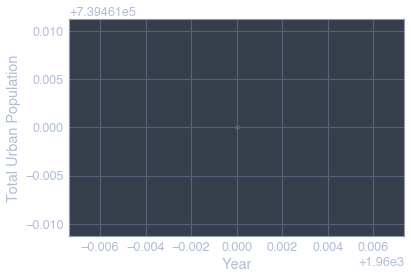

In [14]:
# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop['Total Urban Population'] = [int(i[0] *i[1] *0.01) for i in pops_list]

# Plot urban population data
df_pop.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

### Writing an iterator to load data in chunks (4)

- Processing the entire dataset now

/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


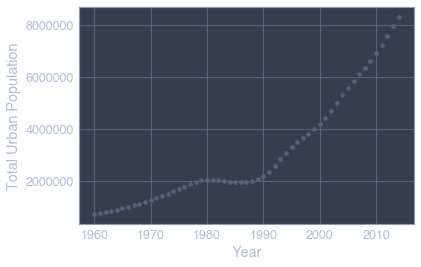

Empty DataFrame
Columns: [CountryName, CountryCode, Year, Total Population, Urban population (% of total), Total Urban Population]
Index: []
[]
0


In [15]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('exercise/world_dev_ind.csv', chunksize=300)
data = pd.DataFrame()
# Get the first DataFrame chunk: df_urb_pop
for df_urb_pop in urb_pop_reader:
    # Check out the head of the DataFrame
    #print(df_urb_pop.head(2))
    # Check out specific country: df_pop_ceb
    df_pop = df_urb_pop[df_urb_pop['CountryCode'] == 'AFG']
    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop['Total Population'],
                   df_pop['Urban population (% of total)'])
    # Turn zip object into list: pops_list
    pops_list = list(pops)
    
    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop['Total Urban Population'] = [int(i[0] *i[1] *0.01) for i in pops_list]
    data = data.append(df_pop)
# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()
# Print pops_list
print(df_pop[0:5])
print(pops_list[0:5])
print(len(pops_list))

### Writing an iterator to load data in chunks (5)

-  put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


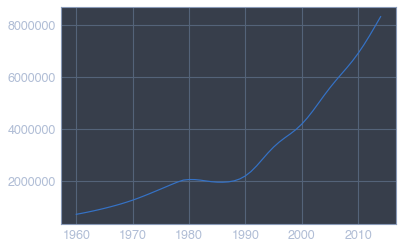

None


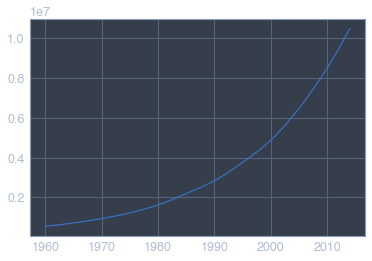

None


In [39]:
def plot_pop(filename, countrycode):
    '''由filename，countrycode，作為參數，畫出指定國家城市人口總數的 scatter 圖'''
    ub_pop_reader = pd.read_csv(filename, chunksize = 1000)
    Total_Urban_Population = pd.DataFrame()
    
    # 迭代每一個chunk
    for df_urb_pop in ub_pop_reader:
        # 提取指定國家資訊
        bool_Series = df_urb_pop['CountryCode'] == countrycode
        df_pop = df_urb_pop[bool_Series]
        # 將 總人口 與 城市人口 比率 計算為 城市人口總數
        df_pop['Total Urban Population'] = df_pop['Total Population'] \
                                            * df_pop['Urban population (% of total)'] * 0.01
        # 記錄此次迴圈結果
        # Note 如果 append 的是 pd.Series ，每一個 chunk 會被認為是獨立的，但若 append 
        # pd.DataFrame 因為 column 的標籤還在所以每個 chunk 的資訊會合併進去
        Total_Urban_Population = \
        Total_Urban_Population.append(df_pop)

    plt.plot(Total_Urban_Population["Year"], Total_Urban_Population['Total Urban Population'])
    plt.show()
    
print(plot_pop('exercise/world_dev_ind.csv', 'AFG'), 
       sep = "\n")
print(plot_pop('exercise/world_dev_ind.csv', 'AGO'), 
       sep = "\n")

## Summary from CH3 to CH6

- What you’ve learned:
    - User-defined functions
    - Iterators
    - List comprehensions 
    - Generators